In [1]:
#import packages
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
##data read
Acc_df = pd.read_csv("US_Accidents.csv")

In [4]:
Acc_df.head()              # data peak

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
Acc_df.shape               # column row count

(3513617, 49)

In [6]:
Acc_df.describe()          # statistic details

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [7]:
Acc_df.info()              # column list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [8]:
Acc_df.isna().any()        # check NA

ID                       False
Source                   False
TMC                       True
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
End_Lat                   True
End_Lng                   True
Distance(mi)             False
Description               True
Number                    True
Street                   False
Side                     False
City                      True
County                   False
State                    False
Zipcode                   True
Country                  False
Timezone                  True
Airport_Code              True
Weather_Timestamp         True
Temperature(F)            True
Wind_Chill(F)             True
Humidity(%)               True
Pressure(in)              True
Visibility(mi)            True
Wind_Direction            True
Wind_Speed(mph)           True
Precipitation(in)         True
Weather_Condition         True
Amenity 

In [9]:
Acc_df['Source'].unique()

array(['MapQuest', 'MapQuest-Bing', 'Bing'], dtype=object)

In [10]:
Acc_df['Severity'].unique()

array([3, 2, 1, 4])

In [11]:
Acc_df['Side'].unique()

Acc_df['State'].unique()

Acc_df['Country'].unique()

Acc_df['Timezone'].unique()

Acc_df['Wind_Direction'].unique()

Acc_df['Weather_Condition'].unique()

Acc_df['Amenity'].unique()

array([False,  True])

In [12]:
Acc_df['Amenity'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Bump'].unique()

Acc_df['Bump'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Junction'].unique()

Acc_df['Junction'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Crossing'].unique()

Acc_df['Crossing'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Give_Way'].unique()

Acc_df['Give_Way'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['No_Exit'].unique()

Acc_df['No_Exit'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Railway'].unique()

Acc_df['Railway'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Roundabout'].unique()

Acc_df['Roundabout'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Station'].unique()

Acc_df['Station'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Stop'].unique()

Acc_df['Stop'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Traffic_Calming'].unique()

Acc_df['Traffic_Calming'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Traffic_Signal'].unique()

Acc_df['Traffic_Signal'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Turning_Loop'].unique()

Acc_df['Turning_Loop'].replace([True, False], ['1', '0'], inplace=True)

Acc_df['Sunrise_Sunset'].unique()

Acc_df['Nautical_Twilight'].unique()

Acc_df['Astronomical_Twilight'].unique()

Acc_df['Civil_Twilight'].unique()

array(['Night', 'Day', nan], dtype=object)

In [13]:
Acc_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,0,0,0,0,0,0,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,0,0,0,0,0,0,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,0,0,0,0,1,0,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,0,0,0,0,0,0,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,0,0,0,0,1,0,Day,Day,Day,Day


In [16]:
df = pd.DataFrame(Acc_df)
df.drop(['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)','Precipitation(in)'], axis=1, inplace=True)
df.dropna(axis=0)
df.head()

df.columns

df.shape

df.isna().sum()

df =df.dropna(axis=0)

df.isna().sum()

ID                       0
Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

In [21]:
df['Start_Time']= pd.to_datetime(df['Start_Time'])
df['hour']= df['Start_Time'].dt.hour
df['year']= df['Start_Time'].dt.year
df['month']= df['Start_Time'].dt.month
df['week']= df['Start_Time'].dt.week
df['day']= df['Start_Time'].dt.weekday_name
df['quarter']= df['Start_Time'].dt.quarter
df['time_zone']= df['Start_Time'].dt.tz
df['time']= df['Start_Time'].dt.time

df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'hour',
       'year', 'month', 'week', 'day', 'quarter', 'time_zone', 'time'],
      dtype='object')

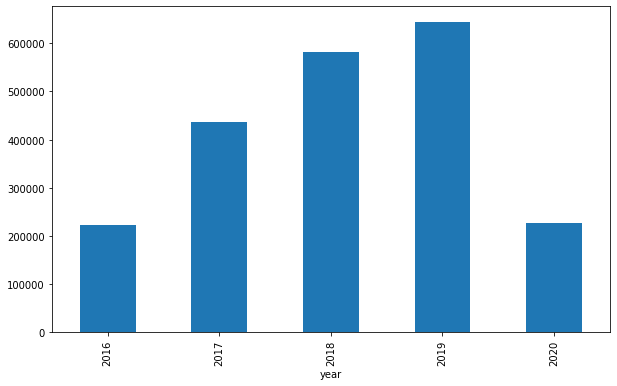

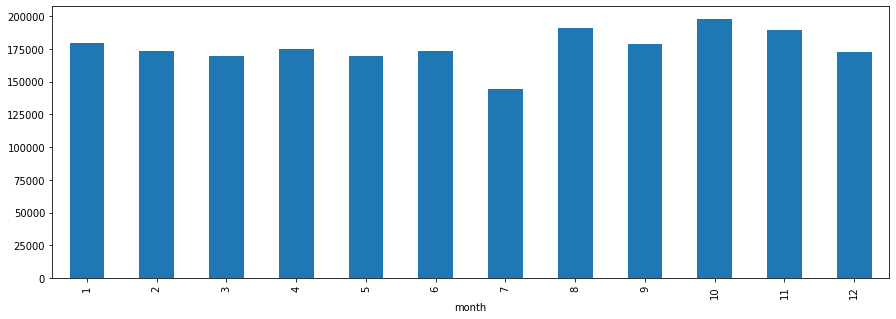

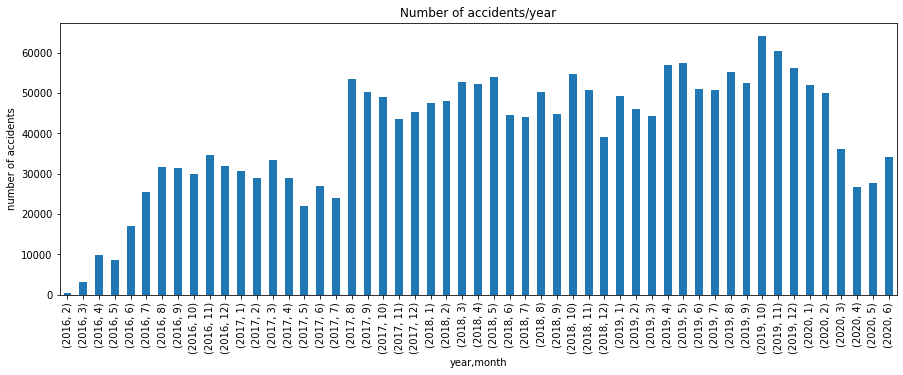

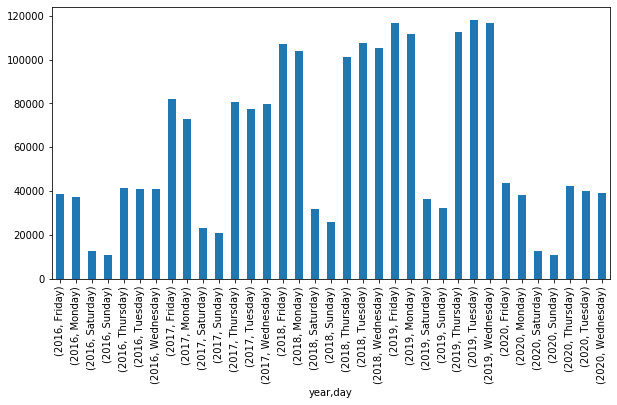

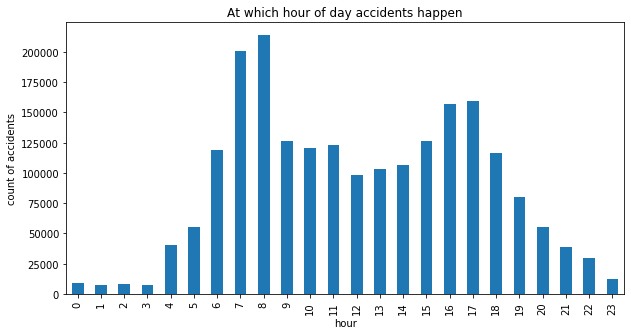

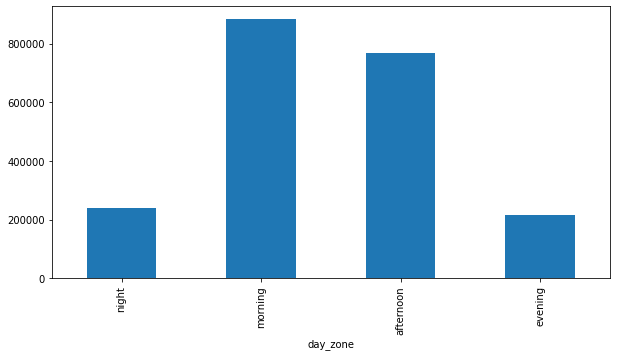

In [22]:
plt.figure(figsize =(10,6))
df.groupby(['year']).size().plot.bar()

df['month'].unique()

plt.figure(figsize =(15,5))
df.groupby(['month']).size().plot.bar()

plt.figure(figsize =(15,5))
df.groupby(['year', 'month']).size().plot.bar()
plt.title('Number of accidents/year')
plt.ylabel('number of accidents')

plt.figure(figsize=(10,5))
df.groupby(['year','day']).size().plot.bar()

plt.figure(figsize =(10,5))
df.groupby(['hour']).size().plot.bar()
plt.title('At which hour of day accidents happen')
plt.ylabel('count of accidents')

df['day_zone'] = pd.cut((df['hour']),bins=(0,6,12,18,24), labels=["night", "morning", "afternoon", "evening"])
plt.figure(figsize =(10,5))
df.groupby(['day_zone']).size().plot.bar()


states=df.State.unique()

In [23]:
count_by_state=[]
for i in df.State.unique():
    count_by_state.append(df[df['State']==i].count()['ID'])
    

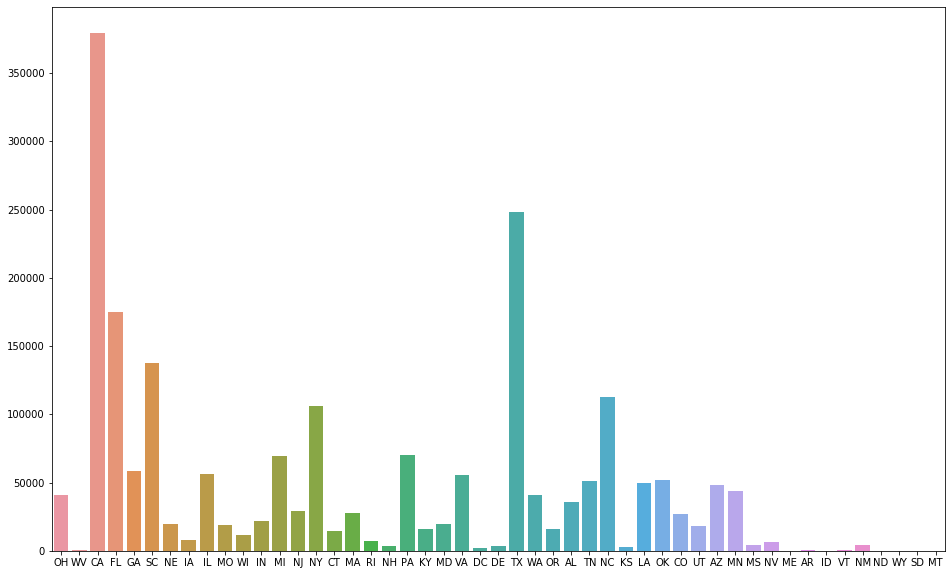

In [24]:
plt.figure(figsize=(16,10))
sns.barplot(states, count_by_state)

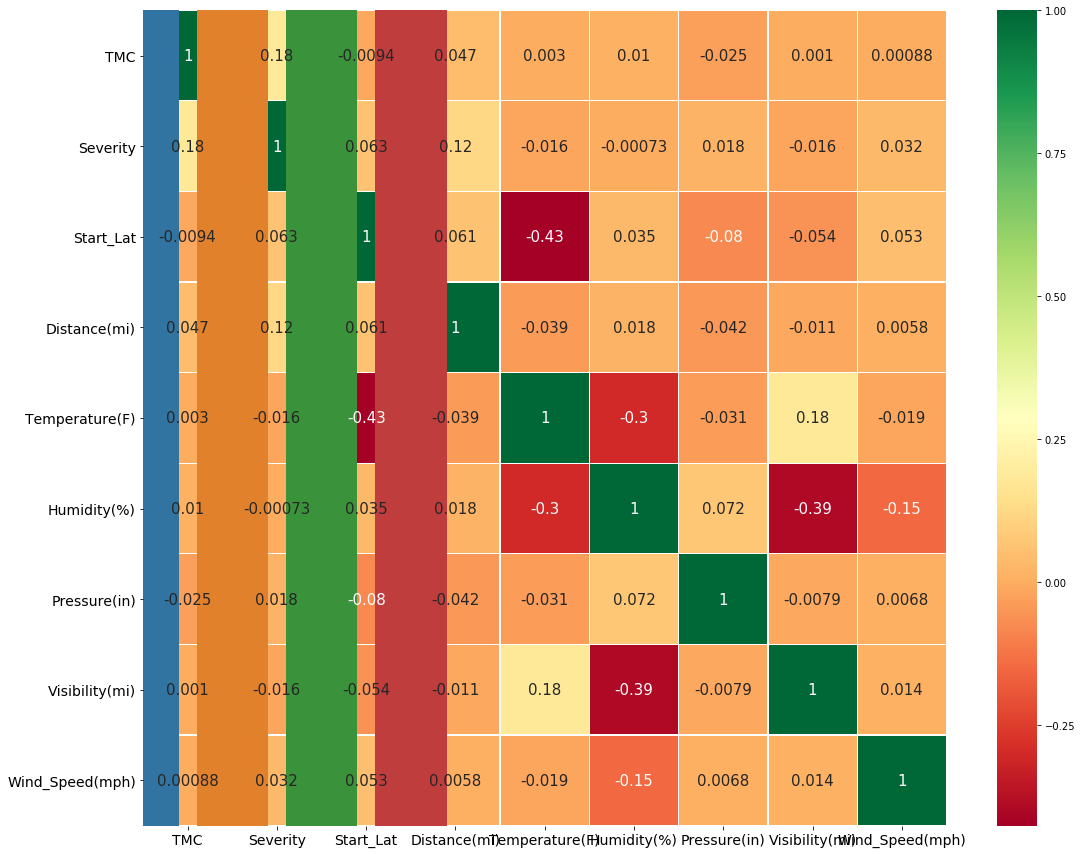

In [25]:
Severity_1_data = df[df['Severity']==1]['Temperature(F)'].mean()
Severity_2_data = df[df['Severity']==2]['Temperature(F)'].mean()
Severity_3_data = df[df['Severity']==3]['Temperature(F)'].mean()
Severity_4_data = df[df['Severity']==4]['Temperature(F)'].mean()
Severity_labels = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']

Mean_temp_by_severity = [Severity_1_data, Severity_2_data, Severity_3_data, Severity_4_data]

plt.figure(figsize=(16, 6))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)

df.shape

fig=sns.heatmap(df[['TMC','Severity','Start_Lat','Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

top 20 accident durations correspond to 84.8% of the data


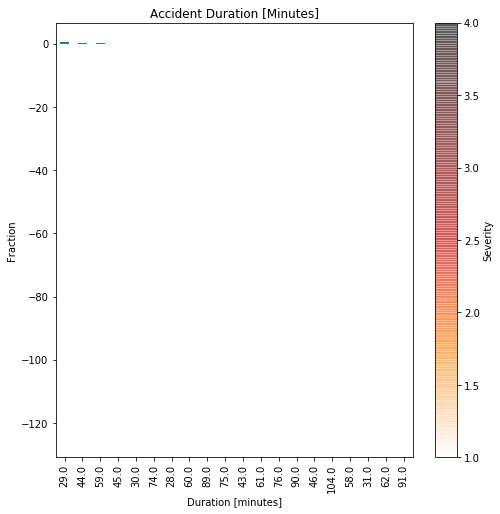

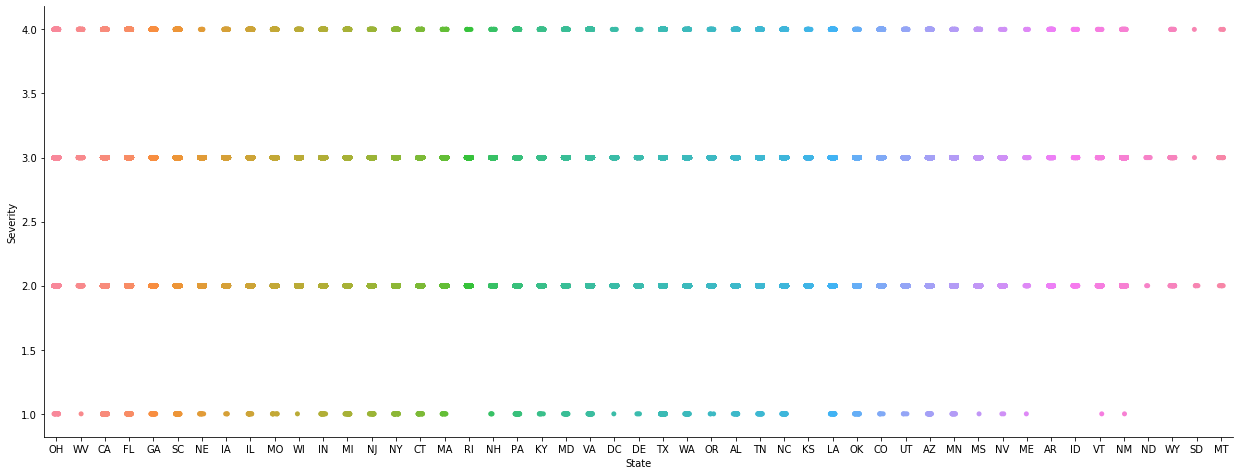

ModuleNotFoundError: No module named 'plotly'

<Figure size 1008x576 with 0 Axes>

In [ ]:
df.plot(kind="scatter", x="Start_Lat", y="Start_Lng", alpha=0.4, figsize=(10,7), 
       c="Severity", cmap="gist_heat_r", colorbar=True, sharex=False);

st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')


diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(8,8))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

sns.catplot('State','Severity',data=df)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

plt.figure(figsize=(14,8))
sub_6=df[df.Severity<5]
viz_4=sub_6.plot(kind='scatter', x='Start_Lng',y='Start_Lat',label='Severity',c='Severity',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
viz_4.legend()
plt.ioff()

import plotly.graph_objects as go
state_count_acc = pd.value_counts(Acc_df['State'])

fig = go.Figure(Acc_df=go.Choropleth(
   locations=state_count_acc.index,
   z = state_count_acc.values.astype(float),
   locationmode = 'USA-states',
   colorscale = 'Reds',
   colorbar_title = "Count Accidents",
))

fig.update_layout(
   title_text = '2016 - 2019 US Traffic Accident Dataset by State',
   geo_scope='usa',
)

fig.show()

In [ ]:
df.isna().sum()

In [ ]:
#######################  SPLIT DF INTO TRAIN AND TEST DATASETS  ##############################

In [ ]:
df['time'].unique()

df.shape

df_sample = df.sample(frac=.02, random_state=3)               # 2% sample

df_sample.shape

df_sample.columns

df_sample = df_sample.drop(columns=['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'time_zone', 'quarter', 'year', 'month', 'week', 'day', 'hour','Description', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp','Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng','Source', 'ID', 'time', 'Turning_Loop', 'Wind_Direction'])


df_sample.info()

df_sample.shape

In [ ]:
sns.pairplot(df_sample,hue='Severity',palette='coolwarm')

In [ ]:
df_sample.columns

In [ ]:
sns.pairplot(df_sample1,hue='Severity',palette='coolwarm')

In [ ]:
df_sample.info()

df_sample.head()



df_sample['Amenity'] = df_sample['Amenity'].map({'1':1, '0':0})
df_sample['Bump'] = df_sample['Bump'].map({'1':1, '0':0})
df_sample['Crossing'] = df_sample['Crossing'].map({'1':1, '0':0})
df_sample['Give_Way'] = df_sample['Give_Way'].map({'1':1, '0':0})
df_sample['Junction'] = df_sample['Junction'].map({'1':1, '0':0})
df_sample['No_Exit'] = df_sample['No_Exit'].map({'1':1, '0':0})
df_sample['Railway'] = df_sample['Railway'].map({'1':1, '0':0})
df_sample['Roundabout'] = df_sample['Roundabout'].map({'1':1, '0':0})
df_sample['Station'] = df_sample['Station'].map({'1':1, '0':0})
df_sample['Stop'] = df_sample['Stop'].map({'1':1, '0':0})
df_sample['Traffic_Calming'] = df_sample['Traffic_Calming'].map({'1':1, '0':0})
df_sample['Traffic_Signal'] = df_sample['Traffic_Signal'].map({'1':1, '0':0})
df_sample['Sunrise_Sunset'] = df_sample['Sunrise_Sunset'].map({'Night':1, 'Day':0})

#df_sample = pd.get_dummies(df_sample, columns=['Sunrise_Sunset'])


df_sample.info()

df_sample.groupby(['Weather_Condition']).size()

In [ ]:
df_sample = df_sample.drop(columns=['Weather_Condition'])

df_sample.info()

In [ ]:
df_sample.to_csv('US_Accidents_sample.csv')

df_sample = pd.read_csv("US_Accidents_sample.csv")
df_sample = df_sample.drop(df_sample.columns[[0]],axis=1)

df_sample.head()

In [ ]:
df_sample.columns

In [ ]:
#import packages
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [ ]:
df_sample = pd.read_csv("US_Accidents_sample.csv")
df_sample = df_sample.drop(df_sample.columns[[0]],axis=1)

In [5]:
df_sample.head()

,TMC,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
0,201.0,2,0.00,84.0,21.0,28.50,10.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,201.0,3,12.87,73.4,83.0,30.18,10.0,5.8,0,0,0,0,1,0,0,0,0,0,0,0,0
2,241.0,2,0.00,81.0,69.0,30.16,10.0,16.0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,201.0,2,0.00,84.9,69.0,29.99,10.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0
4,201.0,2,0.01,24.1,65.0,30.51,10.0,11.5,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
df_sample.columns

Index(['TMC', 'Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset'],
      dtype='object')

In [7]:
df_sample = df_sample.sample(frac = 0.15, random_state = 3)

In [ ]:
########################### Regression data prep ########################################

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA



In [9]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [10]:
# split sample data
train , test = train_test_split(df_sample, test_size = 0.3)
# create train data
X_train = train.drop('Severity', axis=1)
y_train = train['Severity']
# create test data
X_test = test.drop('Severity', axis = 1)
y_test = test['Severity']
# create x,y
Xs = df_sample.drop('Severity', axis=1)
Ys = df_sample['Severity']

In [11]:
train.shape

(4438, 21)

In [12]:
test.shape

(1903, 21)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4438 entries, 5405 to 13858
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TMC              4438 non-null   float64
 1   Severity         4438 non-null   int64  
 2   Distance(mi)     4438 non-null   float64
 3   Temperature(F)   4438 non-null   float64
 4   Humidity(%)      4438 non-null   float64
 5   Pressure(in)     4438 non-null   float64
 6   Visibility(mi)   4438 non-null   float64
 7   Wind_Speed(mph)  4438 non-null   float64
 8   Amenity          4438 non-null   int64  
 9   Bump             4438 non-null   int64  
 10  Crossing         4438 non-null   int64  
 11  Give_Way         4438 non-null   int64  
 12  Junction         4438 non-null   int64  
 13  No_Exit          4438 non-null   int64  
 14  Railway          4438 non-null   int64  
 15  Roundabout       4438 non-null   int64  
 16  Station          4438 non-null   int64  
 17  Stop      

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 14351 to 11967
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TMC              1903 non-null   float64
 1   Severity         1903 non-null   int64  
 2   Distance(mi)     1903 non-null   float64
 3   Temperature(F)   1903 non-null   float64
 4   Humidity(%)      1903 non-null   float64
 5   Pressure(in)     1903 non-null   float64
 6   Visibility(mi)   1903 non-null   float64
 7   Wind_Speed(mph)  1903 non-null   float64
 8   Amenity          1903 non-null   int64  
 9   Bump             1903 non-null   int64  
 10  Crossing         1903 non-null   int64  
 11  Give_Way         1903 non-null   int64  
 12  Junction         1903 non-null   int64  
 13  No_Exit          1903 non-null   int64  
 14  Railway          1903 non-null   int64  
 15  Roundabout       1903 non-null   int64  
 16  Station          1903 non-null   int64  
 17  Stop     

# Scaling

In [15]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# # scaling the features
# x_train_scaled = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(x_train_scaled)
# x_test_scaled = scaler.transform(X_test)
# X_test = pd.DataFrame(x_test_scaled)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [16]:
# for storing performance details of all models
all_models = {'Model':[],'Cross Validation Score':[]}

# KNN CLASSIFIER

[[883 338   5]
 [357 310   3]
 [  5   2   0]]
              precision    recall  f1-score   support

           2       0.71      0.72      0.71      1226
           3       0.48      0.46      0.47       670
           4       0.00      0.00      0.00         7

    accuracy                           0.63      1903
   macro avg       0.40      0.39      0.39      1903
weighted avg       0.62      0.63      0.63      1903

Train Score 1.0
Test Score 0.626904887020494


Text(0, 0.5, 'Error Rate')

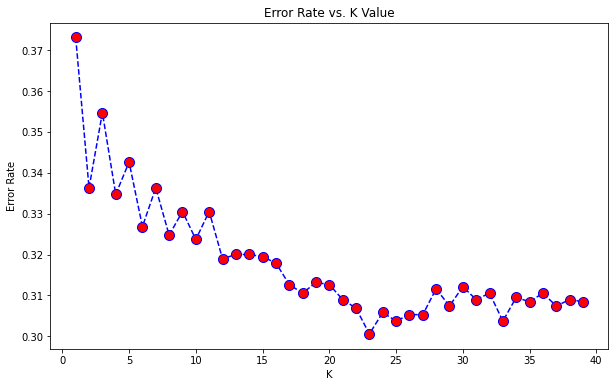

In [17]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("Train Score", knn.score(X_train, y_train))
print("Test Score", knn.score(X_test, y_test))


error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Applying GridSearchCV in KNN for tuning the parameters

In [18]:
param_knn = {'n_neighbors': range(1,20)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Best Cross Validation Score
print("Best Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#Calculating the Cross Validation Scores
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))

#Mean Cross Validation Score
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print(np.mean(scores))

#Finding Best Parameters
print('KNN parameters: ', grid_knn.best_params_)

# Checking the test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

Best Cross-validation score: 0.69

Cross-validation scores:
[0.68693694 0.66441441 0.65765766 0.71171171 0.68918919 0.67792793
 0.70945946 0.72297297 0.70880361 0.64108352]
0.6870157403453114
KNN parameters:  {'n_neighbors': 18}
KNN Test Performance:  0.6894377299001576


### CrossValidation in KNN

In [19]:


kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print('Mean Cross-Validation : ', np.mean(scores))

best_knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 18, weights = 'uniform', algorithm ='auto',p = 1)

best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

print('Train score: {:.4f}%'.format(best_knn.score(X_train, y_train)*100))
print('Test score: {:.4f}%'.format(best_knn.score(X_test, y_test)*100))


Cross-validation scores:
[0.68693694 0.66441441 0.65765766 0.71171171 0.68918919 0.67792793
 0.70945946 0.72297297 0.70880361 0.64108352]
Mean Cross-Validation :  0.6870157403453114
Train score: 72.1947%
Test score: 69.0489%


In [29]:
# Knn_f1_score = f1_score(y_test, grid_knn.predict(X_test), average=None)
# print('f1 score : {:.4f} '.format(f1_score(y_test, grid_knn.predict(X_test))))
ft1 = f1_score(y_pred_knn,y_test, average='micro')
print(ft1)

0.6904887020493957


We are getting the best training and test score with penalty = L2 and C = 0.1

### GridSearchCV in LogisticRegression

In [22]:
model = LogisticRegression(max_iter=1000)
penalty = ['l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
# x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [23]:
print("Best Cross-validation score: {:.2f}".format(grid_search.best_score_))
#Finding Best Parameters
print('KNN parameters: ', grid_search.best_params_)


Best Cross-validation score: 0.70
KNN parameters:  {'C': 0.1, 'penalty': 'l2'}


In [28]:
best_logistic = LogisticRegression(penalty ='l2', C = 0.1, max_iter = 1000)

best_logistic.fit(X_train,y_train)
y_pred = best_logistic.predict(X_test)

print('Train score: {:.4f}%'.format(best_logistic.score(X_train, y_train)*100))
print('Test score: {:.4f}%'.format(best_logistic.score(X_test, y_test)*100))

#Logistic_f1_score = f1_score(y_test,best_logistic.predict(x_test))
#print("f1 score: {:.2f}".format(f1_score(y_test,best_logistic.predict(x_test))))
ft = f1_score(y_pred,y_test, average='micro')
print(ft)

Train score: 70.2794%
Test score: 69.8371%
0.698370993168681


## Linear SVC

In [30]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score = []
test_score = []

for i in c_range:
    clf = LinearSVC(C = i)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))
    

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

### GridSearchCV in LinearSVC

In [31]:
model = LinearSVC()
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
#x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

GridSearchCV(cv=6, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [32]:
print("Best Cross-validation score: {:.2f}".format(grid_search.best_score_))
#Finding Best Parameters
print('Best LinearSVC parameters: ', grid_search.best_params_)


Best Cross-validation score: 0.70
Best LinearSVC parameters:  {'C': 10}


In [34]:
grid_search = LinearSVC(C = 0.001 ,max_iter = 54)
grid_search.fit(X_train, y_train)
y_pred_SVM = grid_search.predict(X_test)
 
print('Train score: {:.4f} %'.format(grid_search.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(grid_search.score(X_test, y_test)*100))

# LinearSVC_f1_score = f1_score(y_test,grid_search.predict(X_test))
# print("f1 score: {:.2f}".format(f1_score(y_test,grid_search.predict(X_test))))
ft2 = f1_score(y_pred_SVM,y_test, average='micro')
print(ft2)

Train score: 69.9189 %
Test score: 69.0489 %
0.6904887020493957


### CrossValidation in LinearSVC

In [35]:
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(clf , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print('Mean Cross-Validation Score : ', np.mean(scores))


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Cross-validation scores:
[0.5990991  0.56306306 0.58108108 0.56081081 0.65990991 0.65315315
 0.58558559 0.59234234 0.68848758 0.61399549]
Mean Cross-Validation Score :  0.6870157403453114
0.698370993168681


## Support Vector Machine

In [36]:
from sklearn import svm

In [37]:
c_range = [0.001,0.01, 0.1, 1, 10,100]

train_score_list = []
test_score_list = []
for C in c_range:
    
    kernal_clf = svm.SVC(kernel = 'linear', C = C)
    kernal_clf.fit(X_train,y_train) 
    train_score_list.append(kernal_clf.score(X_train,y_train))
    test_score_list.append(kernal_clf.score(X_test, y_test))

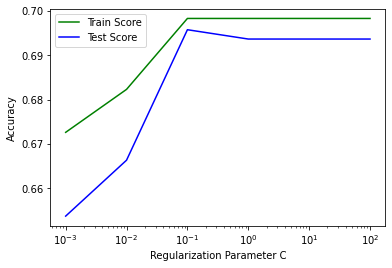

In [38]:
%matplotlib inline
plt.plot(c_range, train_score_list, label = 'Train Score', c = 'g')
plt.plot(c_range, test_score_list, label = 'Test Score', c='b')
plt.xscale('log')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')

plt.legend()

### GridSearchCV in Kernalized SVM ( linear )

In [39]:
model = SVC(kernel = 'linear')

parameters = {'C' : [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [40]:
print("Best Cross-validation score: {:.2f}".format(grid_search.best_score_))
#Finding Best Parameters
print('Best SVM parameters(Kernel = Linear) : ', grid_search.best_params_)


Best Cross-validation score: 0.69
Best SVM parameters(Kernel = Linear) :  {'C': 0.1}


In [41]:
best_svm = SVC(C = 0.001, cache_size = 200, gamma = 0.001, kernel = 'linear', verbose = True)

best_svm.fit(X_train,y_train)
y_pred_kernel = best_svm.predict(X_test)

print('Train score: {:.4f} %'.format(best_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(best_svm.score(X_test, y_test)*100))

# KernalizedSVM_f1_score = f1_score(y_test, best_svm.predict(X_test))
# print("f1 score: {:.2f}".format(f1_score(y_test, best_svm.predict(X_test))))

[LibSVM]Train score: 67.2600 %
Test score: 65.3705 %


### CrossValidation in Kernalized SVM ( linear )

In [42]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(kernal_clf , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print('Mean Cross-Validation Score : ', np.mean(scores))

Cross-validation scores:
[0.67342342 0.68355856 0.69369369 0.70349493 0.70011274]
Mean Cross-Validation Score :  0.6886031465512864


### Kernel = rbf

In [43]:
train = []
test = []
index = []
c_range = [0.001, 0.01,0.1, 1, 10, 100]
gamma_range = [0.001, 0.01,0.1, 1, 10, 100]

for C in c_range:
    for gamma in gamma_range:
        #create the model
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C,gamma))

### GridSearchCV in Kernelized SVM ( rbf )

In [44]:
model = SVC(kernel = 'rbf')

parameters = {'C' : [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [45]:
print("Best Cross-validation score: {:.2f}".format(grid_search.best_score_))
#Finding Best Parameters
print('Best SVM parameters(Kernel = rbf) : ', grid_search.best_params_)

Best Cross-validation score: 0.70
Best SVM parameters(Kernel = rbf) :  {'C': 1}


In [47]:
best_svm = SVC(C = 1, cache_size = 200, gamma = 0.001, kernel = 'rbf', verbose = True)

best_svm.fit(X_train,y_train)
y_pred_kernel = best_svm.predict(X_test)

print('Train score: {:.4f} %'.format(best_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(best_svm.score(X_test, y_test)*100))

# KernalizedSVM_f1_score = f1_score(y_test, best_svm.predict(X_test))
# print("f1 score: {:.2f}".format(f1_score(y_test, best_svm.predict(X_test))))

[LibSVM]Train score: 67.9585 %
Test score: 66.3689 %


### CrossValidation in Kernelized SVM ( rbf )

In [48]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print('Mean Cross-Validation Score : ', np.mean(scores))

Cross-validation scores:
[0.66441441 0.65540541 0.66891892 0.66741826 0.65952649]
Mean Cross-Validation Score :  0.663136699269732


## Due to low computational power of our system, the models below could not be implemented.

## Kernel = poly

In [ ]:
train = []
test = []
index = []
c_range = [0.001, 0.01,0.1, 1, 10, 100]
gamma_range = [0.001, 0.01,0.1, 1, 10, 100]

for C in c_range:
    for gamma in gamma_range:
        #create the model
        svc = SVC(kernel = 'poly', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C,gamma))

### GridSearchCV in Kernelized SVM ( poly )

In [ ]:
model = SVC(kernel = 'poly')

parameters = {'C' : [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

NameError: ignored

In [ ]:
print("Best Cross-validation score: {:.2f}".format(grid_search.best_score_))
#Finding Best Parameters
print('Best SVM parameters(Kernel = poly) : ', grid_search.best_params_)

In [ ]:
best_svm = SVC(C = 1, cache_size = 200, gamma = 0.01, kernel = 'rbf', verbose = True)

best_svm.fit(X_train,y_train)
y_pred_kernel = best_svm.predict(X_test)

print('Train score: {:.4f} %'.format(best_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(best_svm.score(X_test, y_test)*100))

# KernalizedSVM_f1_score = f1_score(y_test, best_svm.predict(X_test))
# print("f1 score: {:.2f}".format(f1_score(y_test, best_svm.predict(X_test))))

### CrossValidation in Kernelized SVM ( poly )

In [ ]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print('Mean Cross-Validation Score : ', np.mean(scores))

## Decision Tree 

In [ ]:
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

### GridSearchCV on DecisionTree

In [ ]:
#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

### CrossValidation on DecisionTree

In [ ]:
print("Best Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
#Finding Best Parameters
print('Best DecisionTree parameters : ', grid_dtree.best_params_)

In [ ]:
best_dtree = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)

best_dtree.fit(X_train, y_train)
y_pred_dtree = best_dtree.predict(X_test)

print('Train score: {:.4f}%'.format(best_dtree.score(X_train, y_train)*100))
print('Test score: {:.4f}%'.format(best_dtree.score(X_test, y_test)*100))

# Decision_f1_score = f1_score(y_test, best_dtree.predict(X_test))
# print('f1 score : {:.4f} '.format(f1_score(y_test, best_dtree.predict(X_test))))

### Best Classification Model

Looking at the values of F1_score, Train Score and Test Score of each of the above models we can conclude that, Linear SVC is the best classifier for this dataset with the values of 
* F1_Score = 0.698370993168681 
* Train Score = 69.9189
* Test Score = 69.0489

This shows that model genralizes to the testing set really well and since the difference between scores is miniscule, hence overfitting will not be an issue.

-----------------------